# Develop a machine learning model to predict customer attrition

### In this project,we develop a machine learning model to predict customer will leave or not 

Following Factors are:
1. ClientID: Unique identifier for each customer.
2. Gender: Customer's gender.
3. IsSenior: Indicates if the customer is a senior citizen (over the age of 65).
4. HasPartner: Whether the customer has a partner.
5. HasDependents: Whether the customer has dependents.
6. ServiceDuration: Number of months the customer has been with the company
7. HasPhoneService: If the customer has subscribed for a phone service.
8. HasMultiplePhoneServices: If the customer has subscribed for multiple phone services.
9. InternetServiceType: Type of internet service the customer has subscribed for.
10. HasCloudSecurity: If the customer has subscribed for cloud security
11. HasCloudBackup: If the customer has subscribed for cloud backup.
12. HasDeviceCoverage: If the customer has subscribed for device coverage.
13. HasTechSupport: If the customer has subscribed for tech support.
14. HasStreamingTV: If the customer has subscribed for streaming TV.
15. HasStreamingMovies: If the customer has subscribed for streaming movies.
16. SubscriptionType: Type of customer subscription.
17. HasElectronicBilling: If the customer has electronic billing.
18. PaymentMethod: Method of payment.

In [2]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/844/1*MyKDLRda6yHGR_8kgVvckg.png')

In [820]:
# Importing the essential Libraries
import pandas as pd
import numpy as np

In [824]:
# Reading the Dataset
df = pd.read_csv('D:\d\check\Customer_Churn-Deployment-master\Customer-Attrition.csv', index_col=0)
df.shape

(7043, 20)

In [825]:
df.reset_index(inplace=True)
df.shape

(7043, 21)

In [826]:
a = [488, 753, 936,1082,1340,3331,3826,4380,5218,6670,6754]
for i in range(len(a)):
    index_1 = a[i]
    new_value = '0'  # Replace with the value you want to add
    # Add the new value at the specified index in the column
    df.at[index_1, 'TotalSubscriptionCost'] = new_value

print(df['TotalSubscriptionCost'])

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalSubscriptionCost, Length: 7043, dtype: object


In [827]:
x = df['TotalSubscriptionCost']
T = []
for i in range(len(x)):
    f = float(x[i])
    r = round(f)
    T.append(r)

Total = pd.Series(T)
df['Total_Subscription_Cost'] = Total


In [828]:
df.shape

(7043, 22)

In [829]:
df.columns

Index(['ClientID', 'Gender', 'IsSenior', 'HasPartner', 'HasDependents',
       'ServiceDuration', 'HasPhoneService', 'HasMultiplePhoneServices',
       'InternetServiceType', 'HasCloudSecurity', 'HasCloudBackup',
       'HasDeviceCoverage', 'HasTechSupport', 'HasStreamingTV',
       'HasStreamingMovies', 'SubscriptionType', 'HasElectronicBilling',
       'PaymentMethod', 'MonthlySubscriptionFee', 'TotalSubscriptionCost',
       'HasAttrited', 'Total_Subscription_Cost'],
      dtype='object')

In [830]:
df.dtypes

ClientID                     object
Gender                       object
IsSenior                      int64
HasPartner                   object
HasDependents                object
ServiceDuration               int64
HasPhoneService              object
HasMultiplePhoneServices     object
InternetServiceType          object
HasCloudSecurity             object
HasCloudBackup               object
HasDeviceCoverage            object
HasTechSupport               object
HasStreamingTV               object
HasStreamingMovies           object
SubscriptionType             object
HasElectronicBilling         object
PaymentMethod                object
MonthlySubscriptionFee      float64
TotalSubscriptionCost        object
HasAttrited                  object
Total_Subscription_Cost       int64
dtype: object

In [831]:
# Printing Unique Values of the categorical variables
print(df['MonthlySubscriptionFee'].unique())
print(df['Gender'].unique())
print(df['TotalSubscriptionCost'].unique())
print(df['HasAttrited'].unique())
print(df['PaymentMethod'].unique())
df['Total_Subscription_Cost'].unique()

[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['Female' 'Male']
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


array([  30, 1890,  108, ..., 1990, 7363, 6844], dtype=int64)

In [832]:
# Checking if there are null values or not
df.isnull().sum()

ClientID                    0
Gender                      0
IsSenior                    0
HasPartner                  0
HasDependents               0
ServiceDuration             0
HasPhoneService             0
HasMultiplePhoneServices    0
InternetServiceType         0
HasCloudSecurity            0
HasCloudBackup              0
HasDeviceCoverage           0
HasTechSupport              0
HasStreamingTV              0
HasStreamingMovies          0
SubscriptionType            0
HasElectronicBilling        0
PaymentMethod               0
MonthlySubscriptionFee      0
TotalSubscriptionCost       0
HasAttrited                 0
Total_Subscription_Cost     0
dtype: int64

In [833]:
df.describe()

,IsSenior,ServiceDuration,MonthlySubscriptionFee,Total_Subscription_Cost
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.728525
std,0.368612,24.559481,30.090047,2266.792771
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,399.000000
50%,0.000000,29.000000,70.350000,1395.000000
75%,0.000000,55.000000,89.850000,3786.500000
max,1.000000,72.000000,118.750000,8685.000000


In [834]:
df.head(1)

,ClientID,Gender,IsSenior,HasPartner,HasDependents,ServiceDuration,HasPhoneService,HasMultiplePhoneServices,InternetServiceType,HasCloudSecurity,...,HasTechSupport,HasStreamingTV,HasStreamingMovies,SubscriptionType,HasElectronicBilling,PaymentMethod,MonthlySubscriptionFee,TotalSubscriptionCost,HasAttrited,Total_Subscription_Cost
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,30


In [1014]:
# Including only Potential Predictors as independent varibles
# final_dataset = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]
final_dataset = df[[
    'Gender',
    'HasPartner',  
     'SubscriptionType', 
     'Total_Subscription_Cost',
    'HasPhoneService',
      'PaymentMethod',
        'HasCloudSecurity',
      'HasStreamingMovies',
        'HasStreamingTV',    
    'HasElectronicBilling',
    'ServiceDuration', 
    'HasAttrited',
      
]]


In [1015]:
final_dataset.dtypes

Gender                     int64
HasPartner                 int64
SubscriptionType           int64
Total_Subscription_Cost    int64
HasPhoneService            int64
PaymentMethod              int64
HasCloudSecurity           int64
HasStreamingMovies         int64
HasStreamingTV             int64
HasElectronicBilling       int64
ServiceDuration            int64
HasAttrited                int64
dtype: object

In [1016]:
final_dataset['Total_Subscription_Cost']

0         30
1       1890
2        108
3       1841
4        152
        ... 
7038    1990
7039    7363
7040     346
7041     307
7042    6844
Name: Total_Subscription_Cost, Length: 7043, dtype: int64

In [1017]:
# Converting the categorical variables into numerical and avoiding Dummy Varibale Trap
# final_dataset = pd.get_dummies(final_dataset)

final_dataset['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
final_dataset['HasAttrited'] = df['HasAttrited'].replace({'Yes': 1, 'No': 0})
final_dataset['HasPartner'] = df['HasPartner'].replace({'Yes': 1, 'No': 0})
final_dataset['Total_Subscription_Cost'] = df['Total_Subscription_Cost']
final_dataset['HasElectronicBilling'] = df['HasElectronicBilling'].replace({'Yes': 1, 'No': 0})
final_dataset['HasPhoneService'] = df['HasPhoneService'].replace({'Yes': 1, 'No': 0})
final_dataset['HasCloudSecurity'] = df['HasCloudSecurity'].replace({'Yes': 1, 'No': 0 , 'No internet service':0})
final_dataset['HasStreamingTV'] = df['HasStreamingTV'].replace({'Yes': 1, 'No': 0 , 'No internet service':0})
final_dataset['HasStreamingMovies'] = df['HasStreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service':0})
final_dataset['SubscriptionType'] = df['SubscriptionType'].replace({'Month-to-month': 0, 'One year': 1, 'Two year':3})
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
final_dataset['PaymentMethod'] = df['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 0, 'Bank transfer (automatic)':1,'Credit card (automatic)':1})

In [1018]:

final_dataset.head()

,Gender,HasPartner,SubscriptionType,Total_Subscription_Cost,HasPhoneService,PaymentMethod,HasCloudSecurity,HasStreamingMovies,HasStreamingTV,HasElectronicBilling,ServiceDuration,HasAttrited
0,1,1,0,30,0,0,0,0,0,1,1,0
1,0,0,1,1890,1,0,1,0,0,0,34,0
2,0,0,0,108,1,0,1,0,0,1,2,1
3,0,0,1,1841,0,1,1,0,0,0,45,0
4,1,0,0,152,1,0,0,0,0,1,2,1


In [1019]:
# # Splitting the Dataset into Dependent and Independent Variables

X = final_dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]]
y = final_dataset.iloc[:, 11].values

In [1020]:
X.dtypes

Gender                     int64
HasPartner                 int64
SubscriptionType           int64
Total_Subscription_Cost    int64
HasPhoneService            int64
PaymentMethod              int64
HasCloudSecurity           int64
HasStreamingMovies         int64
HasStreamingTV             int64
HasElectronicBilling       int64
ServiceDuration            int64
dtype: object

In [1021]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [1022]:
# Splitting the dataset into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 23)


# lOGISTIC REGRESSION

In [1023]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
print(X_test)

      Gender  HasPartner  SubscriptionType  Total_Subscription_Cost  \
4117       0           1                 3                     6330   
1302       1           1                 3                     3534   
6201       1           0                 0                      375   
3784       0           0                 0                     3496   
2739       1           1                 1                     6384   
...      ...         ...               ...                      ...   
1837       0           0                 0                       20   
3588       0           1                 0                      654   
2612       1           1                 0                     1137   
3755       0           0                 0                      319   
2880       0           0                 0                     1043   

      HasPhoneService  PaymentMethod  HasCloudSecurity  HasStreamingMovies  \
4117                1              1                 1               

In [1024]:
y_pred = model.predict(X_test)
print(X_test)

      Gender  HasPartner  SubscriptionType  Total_Subscription_Cost  \
4117       0           1                 3                     6330   
1302       1           1                 3                     3534   
6201       1           0                 0                      375   
3784       0           0                 0                     3496   
2739       1           1                 1                     6384   
...      ...         ...               ...                      ...   
1837       0           0                 0                       20   
3588       0           1                 0                      654   
2612       1           1                 0                     1137   
3755       0           0                 0                      319   
2880       0           0                 0                     1043   

      HasPhoneService  PaymentMethod  HasCloudSecurity  HasStreamingMovies  \
4117                1              1                 1               

In [1025]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[930 110]
 [203 166]]
0.7778566359119943


In [1001]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.49254790631653655


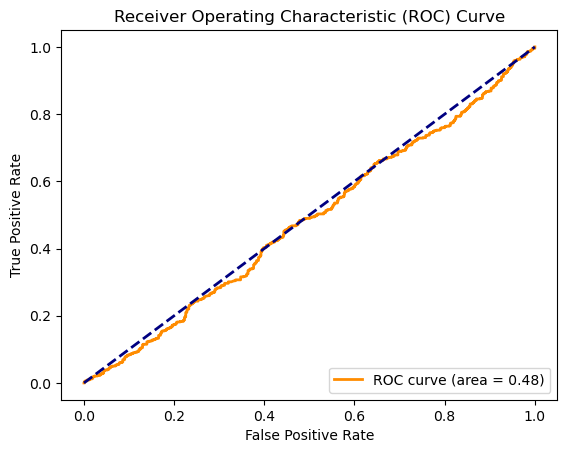

In [1002]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

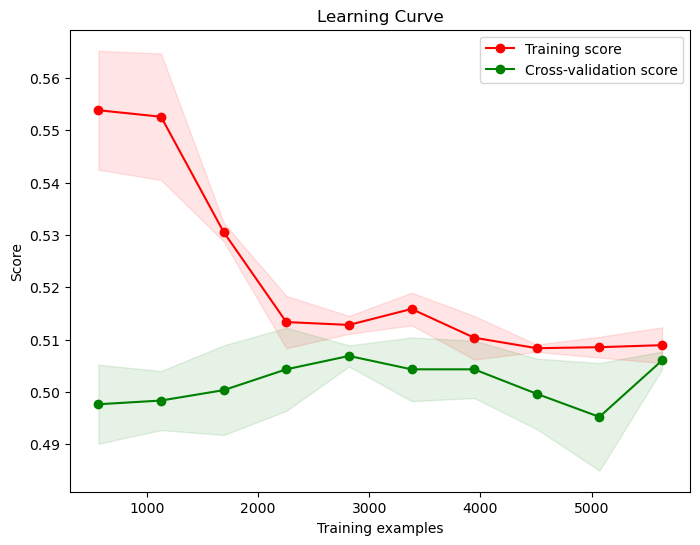

In [993]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming logistic_model is your trained Logistic Regression model

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [976]:
# pickling the Model
import pickle
file = open('Customer_Churn_Prediction.pkl', 'wb')
pickle.dump(model, file)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)